In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

print("All Set!")

All Set!


Choosing the dataset and processing the dataset :

In [15]:
amazon_tvshows = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Amazon Prime TV Shows/titles.csv')

In [16]:
amazon_tvshows.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


Replacing the NaN values and separating the nuemrical and categorical variables 

In [17]:
numerical =[]
categorical = []


for col in amazon_tvshows.columns:
    if amazon_tvshows[col].dtype == 'float64' or amazon_tvshows[col].dtype == 'int64':
        numerical.append(col)
    # numerical.append(col)
else : 
    categorical.append(col)

In [18]:
numerical

['release_year',
 'runtime',
 'seasons',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']

In [19]:
categorical

['tmdb_score']

Checking if there is any null values presented in the dataset:

In [20]:
print("Number of missing values in each numerical column \n")
for c in numerical:
    print(c,":",amazon_tvshows[c].isnull().sum())

Number of missing values in each numerical column 

release_year : 0
runtime : 0
seasons : 8514
imdb_score : 1021
imdb_votes : 1031
tmdb_popularity : 547
tmdb_score : 2082


In [11]:
print("Number of missing values in each categorical column \n")
for c in categorical:
    print(c,":",amazon_tvshows[c].isnull().sum())

Number of missing values in each categorical column 

tmdb_score : 2082


In [12]:
amazon_tvshows.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [13]:
type(amazon_tvshows)

pandas.core.frame.DataFrame

In [14]:
amazon_tvshows.size

148065

In [12]:
amazon_tvshows.ndim

2

In [13]:
len(amazon_tvshows)

9871

Filling the na values with column mean

In [14]:
amazon_tvshows.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [15]:
amazon_tvshows['imdb_score'].fillna(amazon_tvshows['imdb_score'].mean(),inplace=True)

/var/folders/bt/k7t4mr2j6kq79jv3vbj756z80000gn/T/ipykernel_6662/3459012706.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_tvshows['imdb_score'].fillna(amazon_tvshows['imdb_score'].mean(),inplace=True)


In [18]:
amazon_tvshows['imdb_votes'].fillna(amazon_tvshows['imdb_votes'].mean(),inplace=True)

/var/folders/bt/k7t4mr2j6kq79jv3vbj756z80000gn/T/ipykernel_58041/1377020407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_tvshows['imdb_votes'].fillna(amazon_tvshows['imdb_votes'].mean(),inplace=True)


In [19]:
amazon_tvshows['imdb_score'].isna().sum()

np.int64(0)

In [20]:
amazon_tvshows['imdb_votes'].isna().sum()

np.int64(0)

In [21]:
amazon_tvshows.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [25]:
amazon_tvshows['imdb_votes'].describe()

count    8.840000e+03
mean     8.533614e+03
std      4.592015e+04
min      5.000000e+00
25%      1.170000e+02
50%      4.625000e+02
75%      2.236250e+03
max      1.133692e+06
Name: imdb_votes, dtype: float64

In [26]:
amazon_tvshows['imdb_score'].describe()

count    8850.000000
mean        5.976395
std         1.343842
min         1.100000
25%         5.100000
50%         6.100000
75%         6.900000
max         9.900000
Name: imdb_score, dtype: float64

In [ ]:
amazon_tvshows = amazon_tvshows.dropna()

In [30]:
amazon_tvshows.sort_values(by = 'imdb_score', ascending=False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
7422,ts86600,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-G,47,"['drama', 'history']",['US'],2.0,tt9471404,9.4,25538.0,30.771,9.4
8978,ts296021,Clarkson's Farm,SHOW,Follow Jeremy Clarkson as he embarks on his la...,2021,TV-PG,48,"['reality', 'documentation', 'comedy']",['GB'],1.0,tt10541088,9.1,31981.0,18.178,8.6
4577,ts37645,Nathan For You,SHOW,"Self-proclaimed business expert, writer, direc...",2013,TV-14,25,"['comedy', 'documentation']",['US'],4.0,tt2297757,8.9,25396.0,10.796,8.0
5577,ts55428,"The Long, Long Holiday",SHOW,"The daily life of 2 kids brother and sister, w...",2015,TV-PG,26,"['drama', 'family', 'war', 'animation', 'europ...",['FR'],1.0,tt4641870,8.9,428.0,7.210,8.2
7924,ts223059,The Test: A New Era for Australia's Team,SHOW,A docuseries following the Australian Men’s Cr...,2020,TV-14,52,"['drama', 'sport', 'documentation']",['AU'],1.0,tt11347692,8.9,3050.0,1.982,7.6
7435,ts90311,Vinland Saga,SHOW,"For a thousand years, the Vikings have made qu...",2019,TV-MA,24,"['action', 'animation', 'drama', 'history']",['JP'],1.0,tt10233448,8.8,30127.0,12.306,8.7
7518,ts215683,The Untamed,SHOW,"In a land dominated by the mighty Wen clan, a ...",2019,TV-14,44,"['action', 'comedy', 'romance', 'drama', 'fant...",['CN'],1.0,tt10554898,8.8,5963.0,52.565,9.1
5375,ts76483,Buzzfeed Unsolved: True Crime,SHOW,Hosts Ryan & Shane discuss mysteries surroundi...,2016,TV-14,21,"['crime', 'documentation', 'comedy', 'horror']",['US'],8.0,tt7194764,8.8,1557.0,7.134,8.2
7841,ts237536,Panchayat,SHOW,"Panchayat is a comedy-drama, which captures th...",2020,TV-14,30,"['drama', 'comedy']",['IN'],2.0,tt12004706,8.8,50358.0,5.753,8.4
5287,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"['comedy', 'drama', 'crime']",['US'],6.0,tt3032476,8.8,404920.0,352.657,8.5


Assessing the effectiveness of popularity index for movies

<Axes: xlabel='imdb_score', ylabel='imdb_votes'>

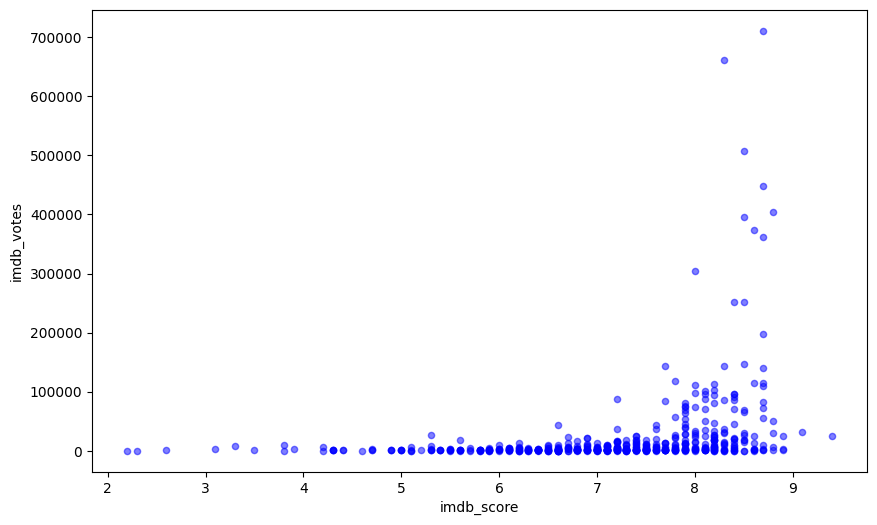

In [32]:
amazon_tvshows.plot.scatter(x='imdb_score', y='imdb_votes', figsize=(10, 6), color='blue', alpha=0.5)

Perform the HeatMap from the above dataset 

Correlation between imdb_score and imdb_votes:  0.291789141578712


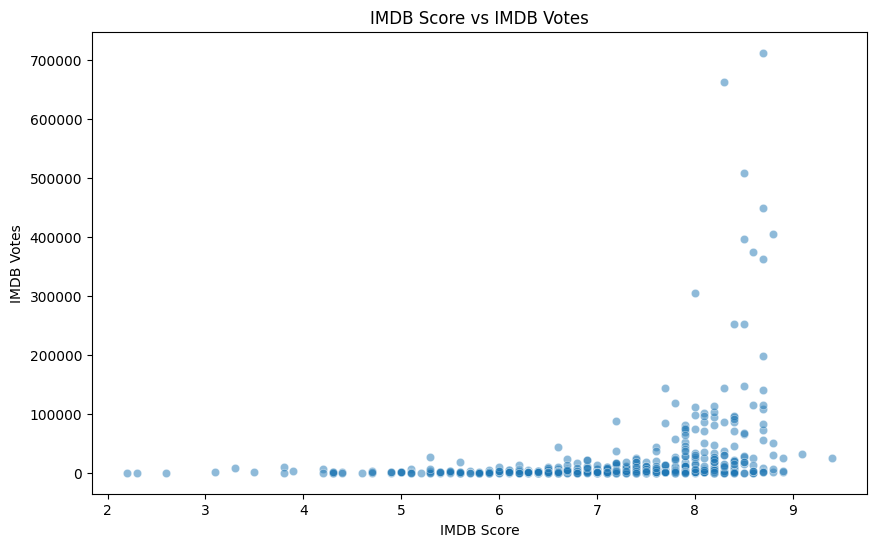

In [33]:
pop_ind_corr = amazon_tvshows['imdb_score'].corr(amazon_tvshows['imdb_votes'])
print("Correlation between imdb_score and imdb_votes: ", pop_ind_corr)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_score', y='imdb_votes', data=amazon_tvshows, alpha=0.5)
plt.title('IMDB Score vs IMDB Votes')
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Votes')
plt.show()
# Splitting the dataset into training and testing sets
X = amazon_tvshows.drop(['imdb_score', 'imdb_votes'], axis=1)
y = amazon_tvshows['imdb_score']        

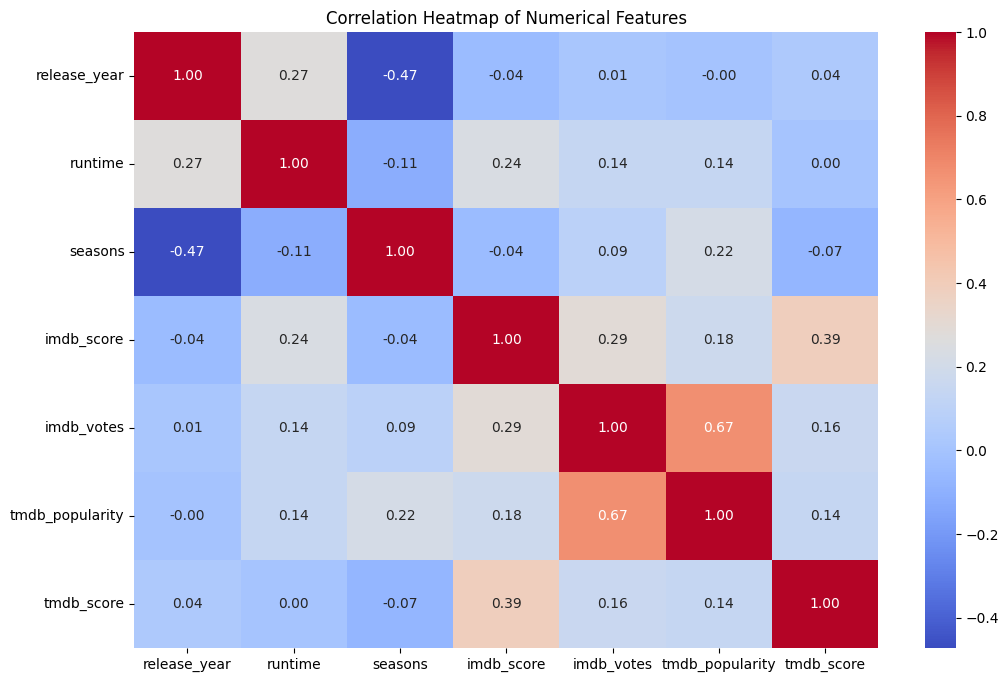

In [36]:
plt.figure(figsize=(12, 8))
corr_matrix = amazon_tvshows[numerical].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Distribution of Person Popularity Indx

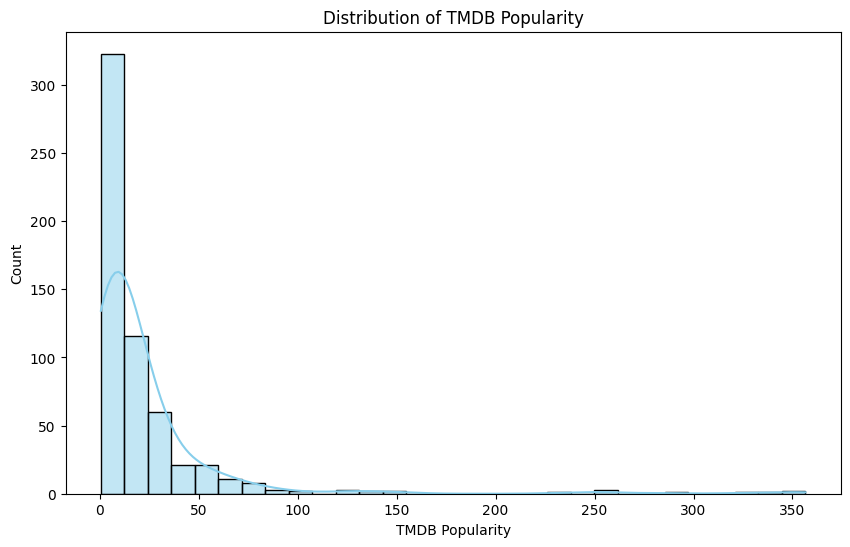

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon_tvshows['tmdb_popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of TMDB Popularity')
plt.xlabel('TMDB Popularity')
plt.ylabel('Count')
plt.show()

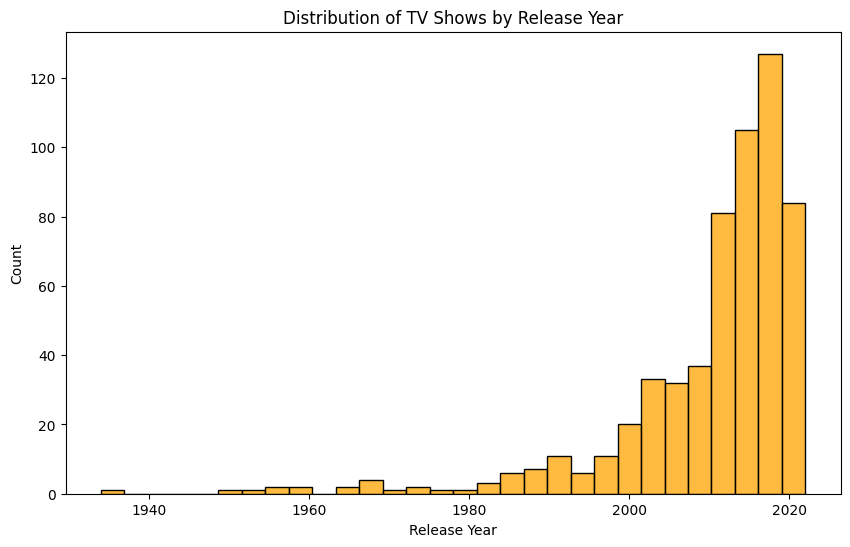

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon_tvshows['release_year'], bins=30, kde=False, color='orange')
plt.title('Distribution of TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [39]:
from sklearn.cluster import KMeans

# Reshape release_year for clustering
release_year_values = amazon_tvshows['release_year'].values.reshape(-1, 1)

# Fit KMeans with 3 clusters (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
amazon_tvshows['release_year_cluster'] = kmeans.fit_predict(release_year_values)

# Show cluster centers
print("Cluster centers (release years):", kmeans.cluster_centers_.flatten())
amazon_tvshows[['release_year', 'release_year_cluster']].head()

Python(66342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Cluster centers (release years): [2015.91935484 1999.13953488 1963.5       ]


,release_year,release_year_cluster
0,1934,2
956,1951,2
969,1968,2
980,1971,2
983,1966,2


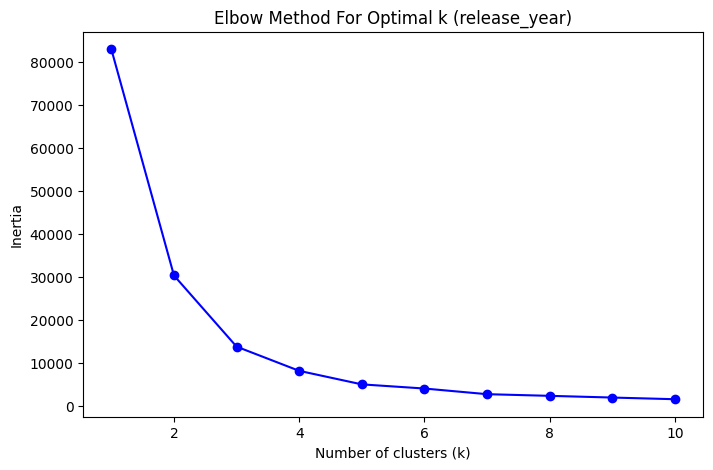

In [40]:

inertia = []
K = range(1, 11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(release_year_values)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (release_year)')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X_votes = amazon_tvshows[['imdb_votes']]
y_scores = amazon_tvshows['imdb_score']

# Fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_votes, y_scores)

# Print the coefficients
print("Intercept:", linreg.intercept_)
print("Slope:", linreg.coef_[0])

Intercept: 7.031791314047355
Slope: 5.015430653416954e-06


In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Predictive modeling using RandomForestClassifier to predict 'release_year_cluster'

# Prepare features and target
features = X.select_dtypes(include=[np.number]).drop(columns=['release_year_cluster'], errors='ignore')
target = amazon_tvshows['release_year_cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         5

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

